In [14]:
from jax import config
config.update("jax_enable_x64", True)

import numpy as np
import jax
import jax.numpy as jnp
import healpy as hp
import s2fft 
# import plotting_functions


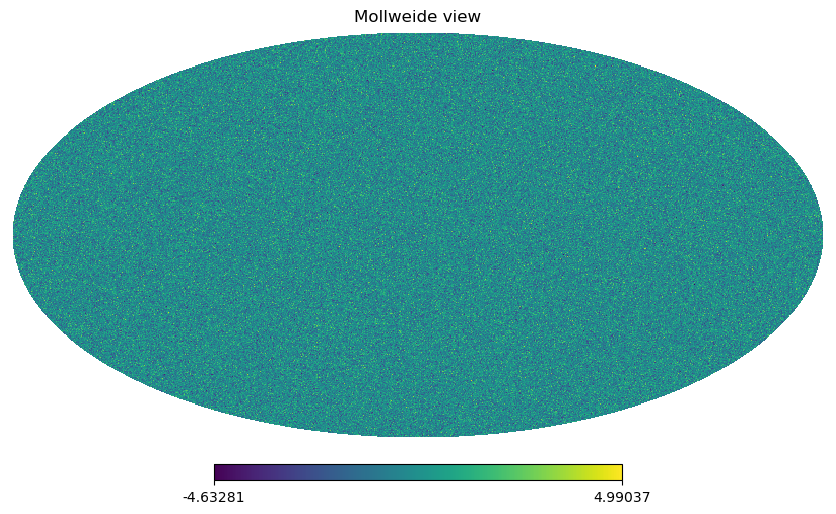

In [15]:
nside = 512
npix = 12*nside**2
lmax = 2*nside

key = jax.random.PRNGKey(0)

map_in = jax.random.normal(key, shape=(npix,))
map_in_np = np.array(map_in)
hp.mollview(map_in)

In [16]:
%%time
flm_HP = hp.map2alm(map_in_np, lmax=lmax, iter=0)

CPU times: user 229 ms, sys: 14.3 ms, total: 243 ms
Wall time: 67.2 ms


In [17]:
%%time
sampling = "healpix"

precomps = s2fft.generate_precomputes(lmax+1, 0, sampling, nside, True)


CPU times: user 18.8 s, sys: 21.4 s, total: 40.3 s
Wall time: 2min 26s


In [18]:
%%time
flm_check = s2fft.forward_jax(
    map_in,
    lmax+1,
    spin=0,
    nside=nside,
    sampling=sampling,
    reality=True,
    precomps=precomps,
    spmd=False,
    )

CPU times: user 54.4 s, sys: 1.34 s, total: 55.8 s
Wall time: 46.4 s


In [19]:
%%time
flm_check = s2fft.forward_jax(
    map_in,
    lmax+1,
    spin=0,
    nside=nside,
    sampling=sampling,
    reality=True,
    precomps=precomps,
    spmd=False,
    )

CPU times: user 26.8 s, sys: 367 ms, total: 27.1 s
Wall time: 17.6 s


In [20]:
%%time
flm_check = s2fft.forward_jax(
    map_in,
    lmax+1,
    spin=0,
    nside=nside,
    sampling=sampling,
    reality=True,
    precomps=precomps,
    spmd=False,
    )

CPU times: user 26.7 s, sys: 377 ms, total: 27.1 s
Wall time: 17.8 s


In [21]:
%%time
map_output_HP = hp.alm2map(flm_HP, lmax=lmax, nside=nside)

CPU times: user 167 ms, sys: 13.4 ms, total: 180 ms
Wall time: 41.3 ms


In [22]:
%%time
precomps_inverse = s2fft.generate_precomputes(lmax+1, 0, sampling, nside, False)

CPU times: user 18.2 s, sys: 22.4 s, total: 40.6 s
Wall time: 2min 33s


In [23]:
%%time
map_output_S2FFT = s2fft.inverse(
        flm_check,
        lmax+1,
        spin=0,
        nside=nside,
        sampling=sampling,
        method="jax",
        reality=True,
        precomps=precomps_inverse,
        spmd=False,
    )

2024-02-29 10:22:49.318037: E external/xla/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module jit_inverse_jax] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2024-02-29 10:26:12.706417: E external/xla/xla/service/slow_operation_alarm.cc:133] The operation took 5m23.389885s

********************************
[Compiling module jit_inverse_jax] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


CPU times: user 5min 43s, sys: 16.1 s, total: 6min
Wall time: 5min 59s


In [24]:
%%time
map_output_S2FFT = s2fft.inverse(
        flm_check,
        lmax+1,
        spin=0,
        nside=nside,
        sampling=sampling,
        method="jax",
        reality=True,
        precomps=precomps_inverse,
        spmd=False,
    )

CPU times: user 27 s, sys: 433 ms, total: 27.5 s
Wall time: 19 s


In [25]:
%%time
map_output_S2FFT = s2fft.inverse(
        flm_check,
        lmax+1,
        spin=0,
        nside=nside,
        sampling=sampling,
        method="jax",
        reality=True,
        precomps=precomps_inverse,
        spmd=False,
    )

CPU times: user 26.6 s, sys: 377 ms, total: 27 s
Wall time: 17.9 s


In [26]:
diff = jnp.abs(map_output_S2FFT-map_in)

print(jnp.max(diff), jnp.mean(diff), jnp.std(diff))

4.257247204085525 0.6508862980435486 0.49145927892759467
